<a href="https://colab.research.google.com/github/wireminer/effective-octo-waddle/blob/main/House%20Pricing%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
data = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(data)
data.head()


      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [29]:
data.size

27000

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


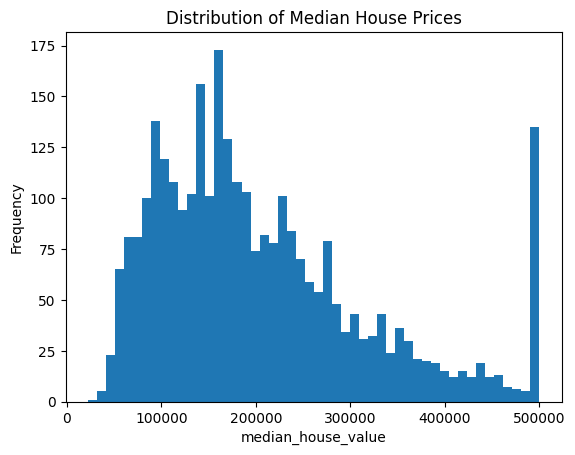

In [31]:
plt.hist(data['median_house_value'], bins=50)
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Prices')
plt.show()

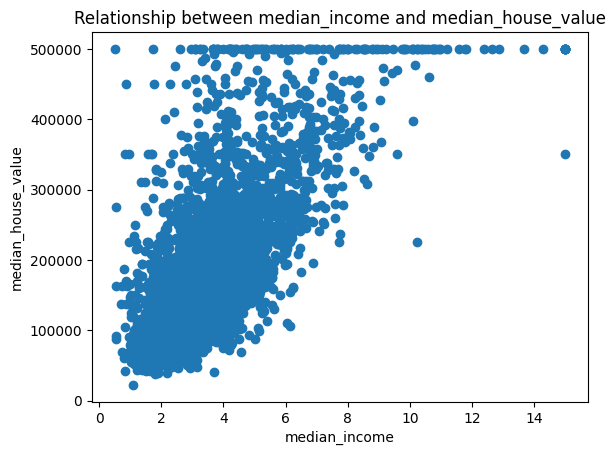

In [32]:
plt.scatter(data['median_income'],data['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Relationship between median_income and median_house_value' )
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
print(x)
print(y)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  
0         1537.0 

In [34]:
x_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=0)
train_data=x_train.join(y_train)
print(train_data)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2370    -122.05     37.31                25.0       4601.0           696.0   
1774    -118.16     33.96                24.0       1635.0           507.0   
731     -121.69     36.62                19.0       1907.0           323.0   
271     -121.96     37.33                35.0       2294.0           411.0   
1077    -122.30     37.81                52.0        572.0           109.0   
...         ...       ...                 ...          ...             ...   
763     -117.31     33.17                 7.0       2349.0           312.0   
835     -122.25     37.89                41.0       1125.0           195.0   
1653    -116.98     33.26                12.0       5898.0          1002.0   
2607    -120.69     38.44                13.0       1473.0           265.0   
2732    -119.60     36.58                28.0       1452.0           300.0   

      population  households  median_income  median_house_value

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

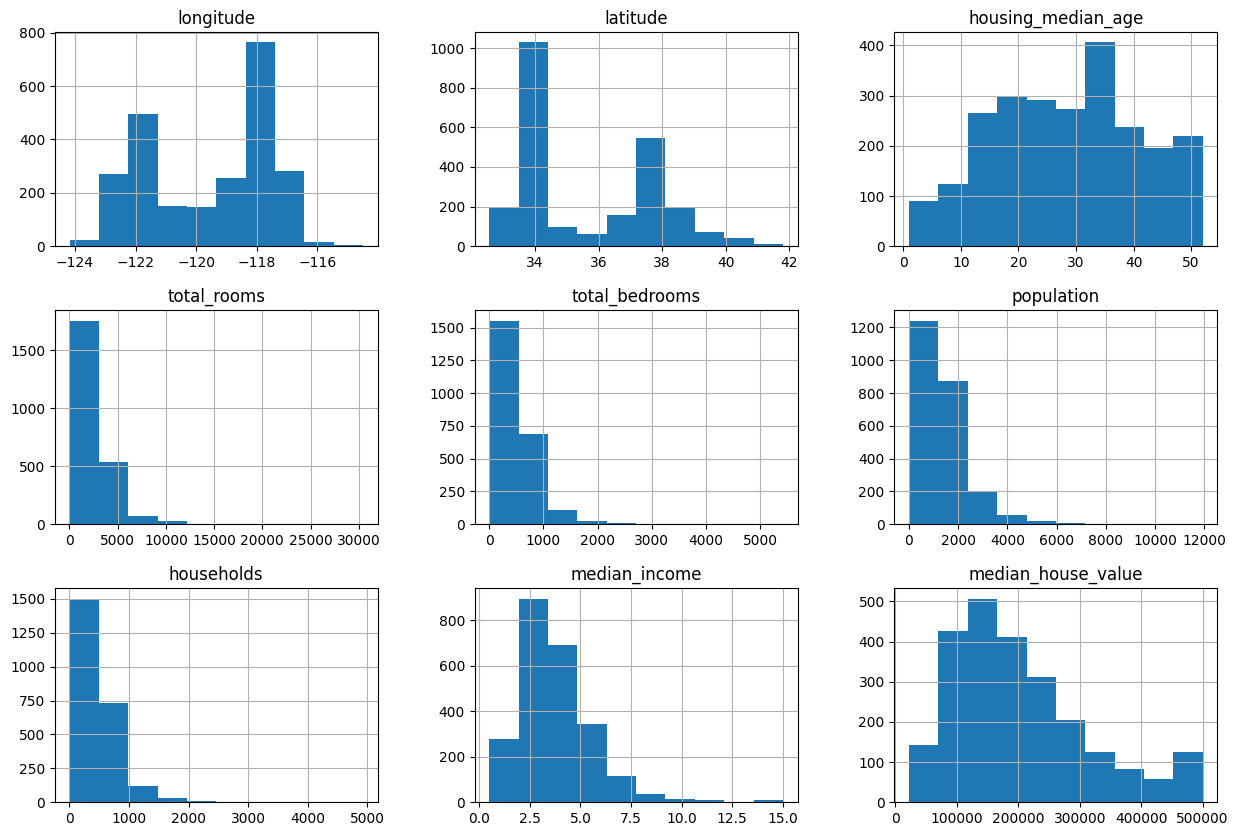

In [35]:
train_data.hist(figsize=(15,10))

In [36]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train, y_train)
y_pred = model_SVR.predict(x_train)
print(mean_absolute_percentage_error(y_train, y_pred))

0.5041030414626151


In [37]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train, y_train)
model_RFR.score(x_train, y_train)

0.9629617706495255

In [38]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
y_pred = model_LR.predict(x_train)
print(mean_absolute_percentage_error(y_train, y_pred))

0.2994306275492762
